# Task 2 

## Credit / Home Loans 

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 


 The data provided can be found in the Resources folder as well as (https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset).


The Home Loans Department manager wants to know the following:


How do the the loan statuses compare? i.e. what is the distrubition of each?

How many of the loan applicants have dependents based on the historical dataset?

How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

Are applicants with a credit history more likely to default than those who do not have one?

Is there a correlation between the applicant's income and the loan amount they applied for? 



## Import Libraries




In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,classification_report,roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

## Import Datasets

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA

In [83]:
#First 5 rows of dataset
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,5849,0.0,128.0,360.0,1.0,1,1
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,-1,0
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,1
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,1
4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1,1


In [76]:
#First 5 rows of test dataset
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
#Type of columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [99]:
#Shape of dataset
df.shape

(614, 13)

In [100]:
#Columns of dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [101]:
#Some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [102]:
#Basic statistics information about dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [103]:
#Duplicat values
df.duplicated().sum()

0

In [4]:
#Null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#Categorical columns of dataset
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

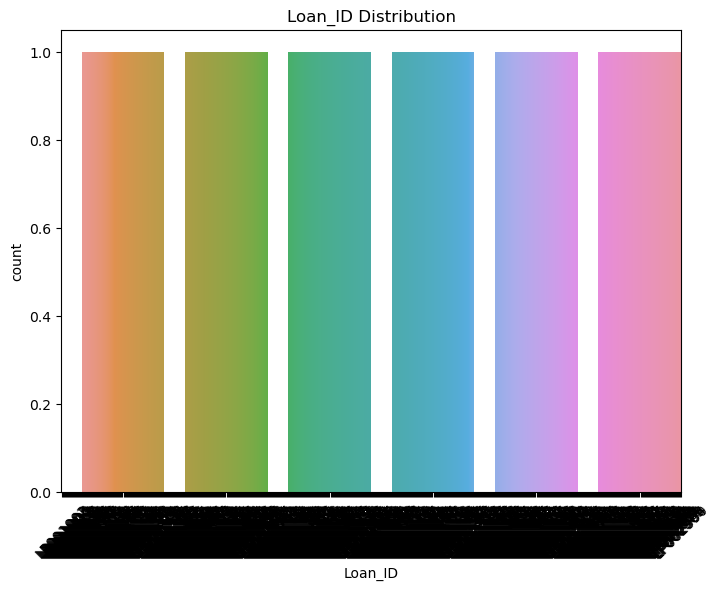

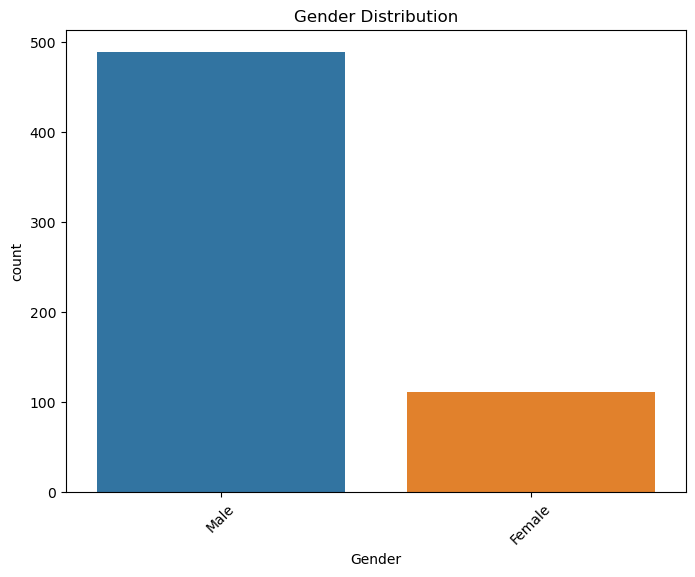

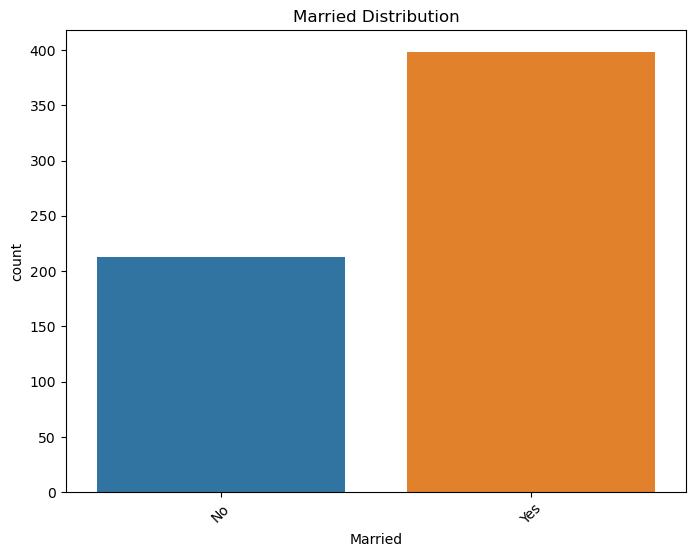

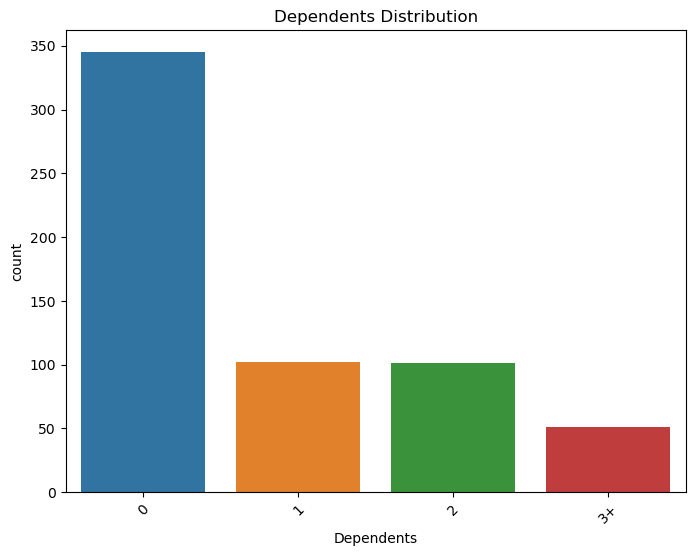

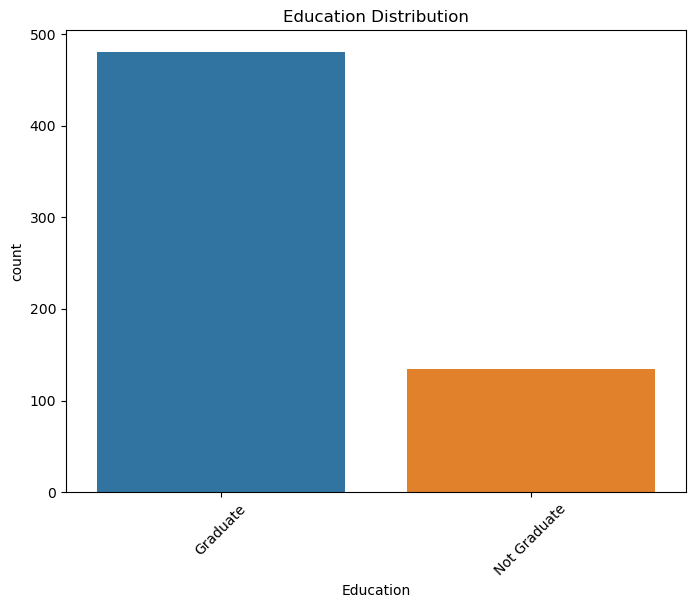

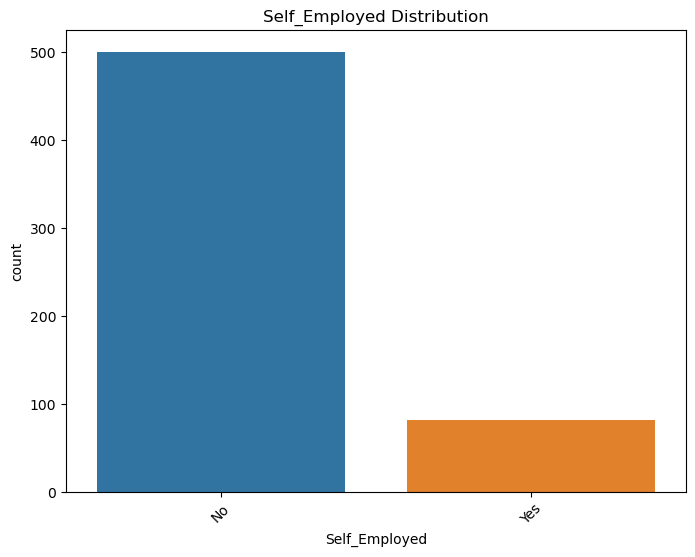

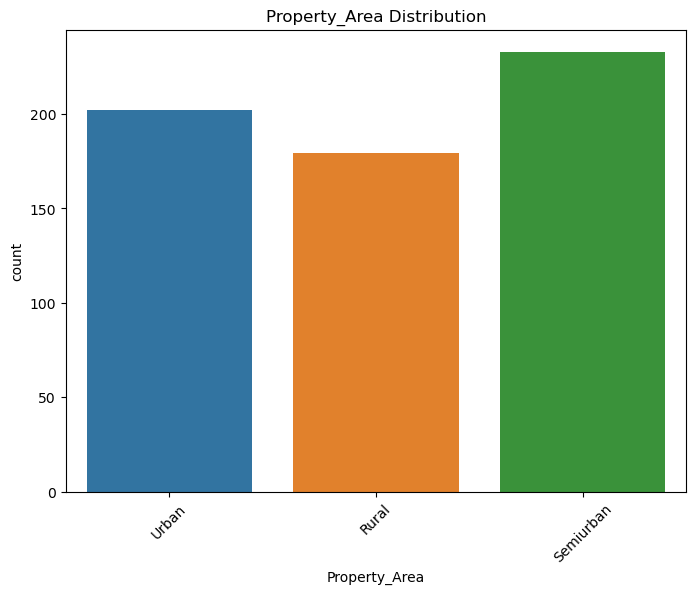

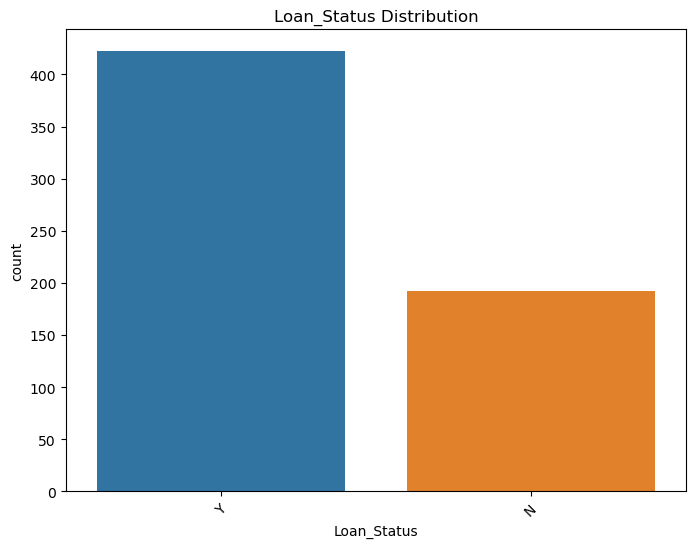

In [106]:
#Visualize the categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()

In [6]:
#Numerical columns of dataset
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

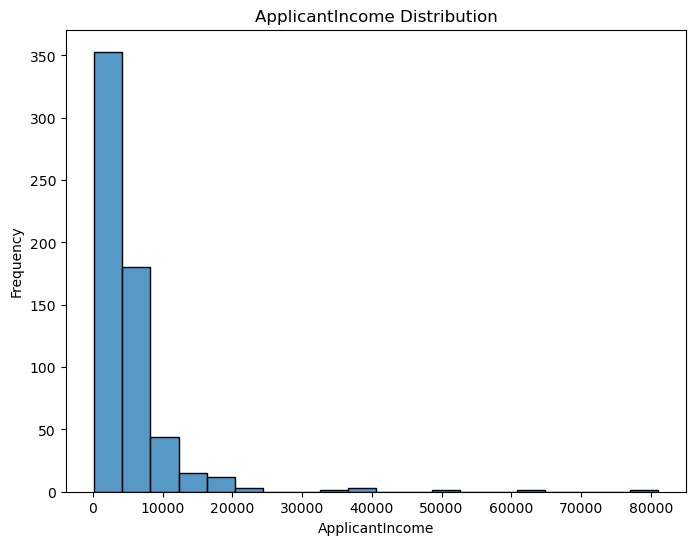

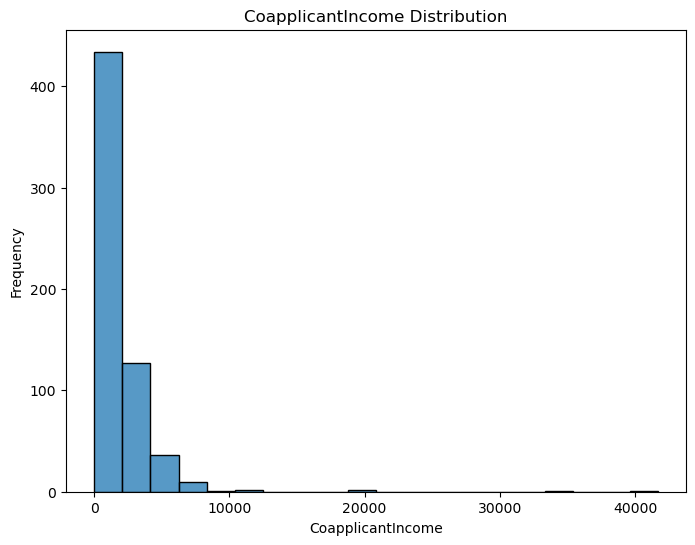

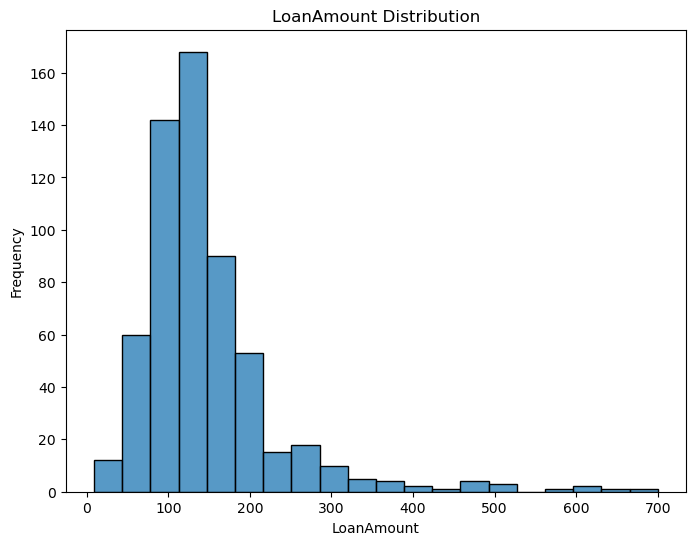

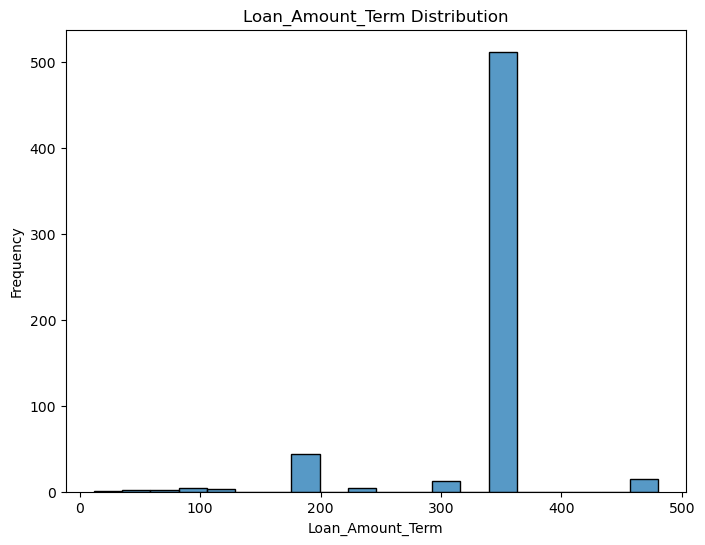

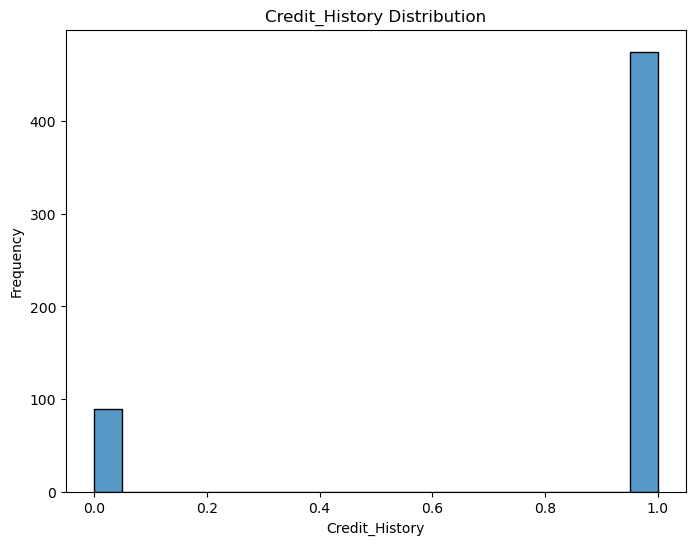

In [108]:
#Visualize the numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=20)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [7]:
#Let's fill the null values
df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace=True)
df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace=True)
df['Dependents'].fillna(df['Dependents'].value_counts().idxmax(), inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().idxmax(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['Loan_Status'].fillna('Unknown', inplace=True)

In [8]:
#let's check null values in the dataset
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# Convert specified columns to categorical
df['Gender'] = df['Gender'].astype('category')
df['Married'] = df['Married'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Self_Employed'] = df['Self_Employed'].astype('category')
df['Property_Area'] = df['Property_Area'].astype('category')

# Dependents
df['Dependents'].replace('3+',3,inplace = True)
df['Dependents'] = df['Dependents'].astype('int')

In [10]:
#Check the type of columns again
df.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents              int32
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
Loan_Status            object
dtype: object

## Let's discover some ranges of things about dataset which were asked by The Home Loans Department manager before starting task

**How do the the loan statuses compare? i.e. what is the distrubition of each?**

In [11]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

**How many of the loan applicants have dependents based on the historical dataset?**

In [12]:
df.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

**How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?**

In [13]:
round(df.groupby('Self_Employed')['ApplicantIncome'].mean(),1)

Self_Employed
No     5098.7
Yes    7380.8
Name: ApplicantIncome, dtype: float64

**Are applicants with a credit history more likely to default than those who do not have one?**

In [14]:
df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.209524,0.790476


**Is there a correlation between the applicant's income and the loan amount they applied for?**

In [15]:
correllation=df['ApplicantIncome'].corr(df['LoanAmount'])
correllation

0.5651805176233125

## Correlation matrix

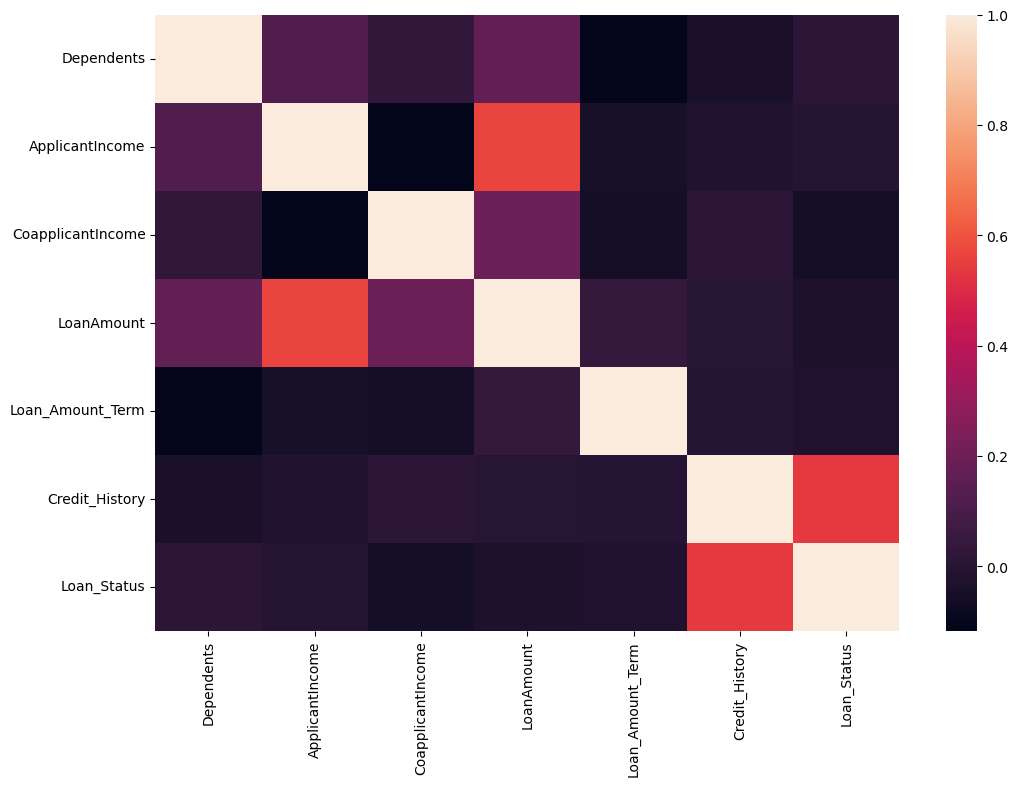

In [107]:
corr = df.corr()

plt.figure(figsize=(12,8))

#plot the heatmap
sns.heatmap(corr)
plt.show()

## One Hot Encoder

In [117]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
#Let's print categorical columns
print(df.Gender.value_counts())
print(df.Married.value_counts())
print(df.Education.value_counts())
print(df.Self_Employed.value_counts())
print(df.Property_Area.value_counts())
print(df.Dependents.value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64


In [18]:
#Drop Loan Id

df.drop('Loan_ID',axis=1,inplace= True)

In [19]:
# Gender
map_gender = {
    'Male': 0,
    'Female': 1
}
df['Gender'] = df['Gender'].map(map_gender)

# Married
map_married = {
    'Yes': 0,
    'No': 1
}
df['Married'] = df['Married'].map(map_married)

# Education
map_education = {
    'Graduate': 0,
    'Not Graduate': 1
}
df['Education'] = df['Education'].map(map_education)

# Self_Employed
map_self_employed = {
    'Yes': 0,
    'No': 1
}
df['Self_Employed'] = df['Self_Employed'].map(map_self_employed)

# Property_Area
map_property_area = {
    'Semiurban': 0,
    'Urban': 1,
    'Rural': -1 
}
df['Property_Area'] = df['Property_Area'].map(map_property_area)

# 'Loan_Status' column
df['Loan_Status'] = df['Loan_Status'].map({'N': 0, 'Y': 1}).astype(int)

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,5849,0.0,128.0,360.0,1.0,1,1
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,-1,0
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,1
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,1
4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1,1


## Features and Target

In [21]:
X =df.drop('Loan_Status', axis =1)

y=df['Loan_Status']

In [47]:
#Firts 5 rows of Features
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,1,5849,0.0,126.0,360.0,1.0,1
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,-1
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1
4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1


## Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
158,0,1,0,0,1,2980,2083.0,120.0,360.0,1.0,-1
154,0,1,0,0,1,3254,0.0,50.0,360.0,1.0,1
40,0,1,0,0,1,3600,0.0,80.0,360.0,1.0,1
304,0,1,0,0,1,4000,2500.0,140.0,360.0,1.0,-1
196,0,0,1,0,1,4796,0.0,114.0,360.0,0.0,0


In [50]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
474,0,1,2,0,1,5532,4648.0,162.0,360.0,1.0,-1
236,0,0,0,0,1,5746,0.0,255.0,360.0,1.0,1
27,0,0,2,1,1,4226,1040.0,110.0,360.0,1.0,1
8,0,0,2,0,1,13633,0.0,280.0,240.0,1.0,1
94,0,0,1,0,1,4609,2333.0,123.0,360.0,0.0,0


## Feature Scaling

In [23]:
#Columns of X train
columns=X_train.columns
columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [24]:
#Let's create Standart Scaler
scaler=StandardScaler()

In [25]:
#Scale X train and X test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
#the type of data changes after scaling
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [26]:
#Let's convert numpy array to pandas dataframe
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [27]:
#First 5 rows of X train after scaling
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.473750,-0.711432,-0.763047,-0.531022,0.40436,-0.400019,0.493485,-0.179308,0.269838,0.417901,-0.051666
1,-0.473750,1.405616,0.225491,-0.531022,0.40436,0.846479,-0.547973,0.570804,0.269838,0.417901,-0.051666
2,-0.473750,-0.711432,-0.763047,-0.531022,0.40436,-0.251196,0.074388,0.028416,0.269838,-2.392912,-1.320074
3,2.110819,1.405616,-0.763047,-0.531022,0.40436,-0.271490,-0.547973,-0.352410,-2.577377,0.417901,1.216742
4,-0.473750,-0.711432,1.214029,-0.531022,0.40436,-0.136949,-0.049869,0.039956,0.269838,0.417901,-0.051666


In [28]:
#First 5 rows of X test after scaling
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.473750,1.405616,-0.763047,-0.531022,-2.473043,0.220374,-0.547973,-0.721696,0.269838,0.417901,-0.051666
1,2.110819,1.405616,-0.763047,-0.531022,0.404360,-0.208805,-0.547973,-0.398571,0.269838,0.417901,-0.051666
2,-0.473750,-0.711432,-0.763047,-0.531022,0.404360,0.077264,0.854763,2.047948,0.269838,0.417901,1.216742
3,-0.473750,-0.711432,-0.763047,-0.531022,0.404360,-0.193321,0.332238,-0.421652,0.269838,0.417901,1.216742
4,-0.473750,-0.711432,1.214029,-0.531022,0.404360,-0.437600,-0.128876,-0.571674,0.269838,0.417901,-0.051666


## Machine Learning Model Selection

**Logistic Regression**

In [30]:
# Create Logistic Regression Object
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [31]:
# Predicting the Test set results
lg_pred=lg.predict(X_test)

In [32]:
#Print train and test accuracy score
print('train_accuracy :', lg.score(X_train,y_train))
print('test_accuracy :' ,lg.score(X_test, y_test))

train_accuracy : 0.8044806517311609
test_accuracy : 0.8373983739837398


In [33]:
#Classification Report
lg_report=classification_report(y_test,lg_pred)
print(lg_report)

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



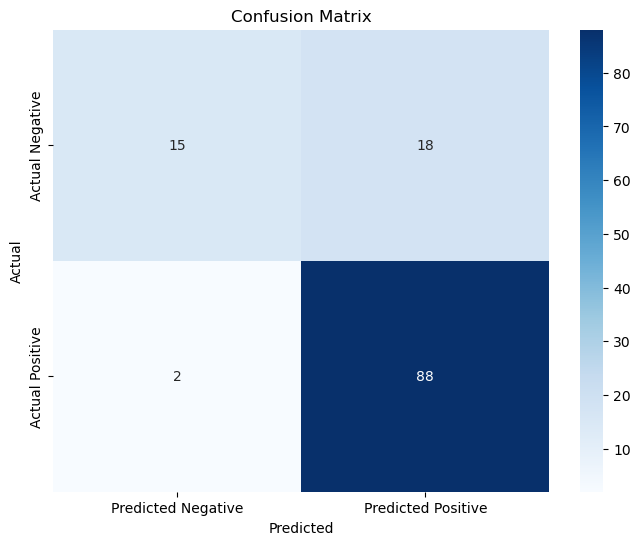

In [34]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, lg_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**SVM**

In [35]:
# Create SVM Object
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [36]:
# Predicting the Test set results
svm_pred=svm.predict(X_test)

In [37]:
#Print train and test accuracy score
print('train_accuracy :', svm.score(X_train,y_train))
print('test_accuracy :' ,svm.score(X_test, y_test))

train_accuracy : 0.8167006109979633
test_accuracy : 0.8211382113821138


In [38]:
#Classification Report
svm_report=classification_report(y_test,svm_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                           0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123



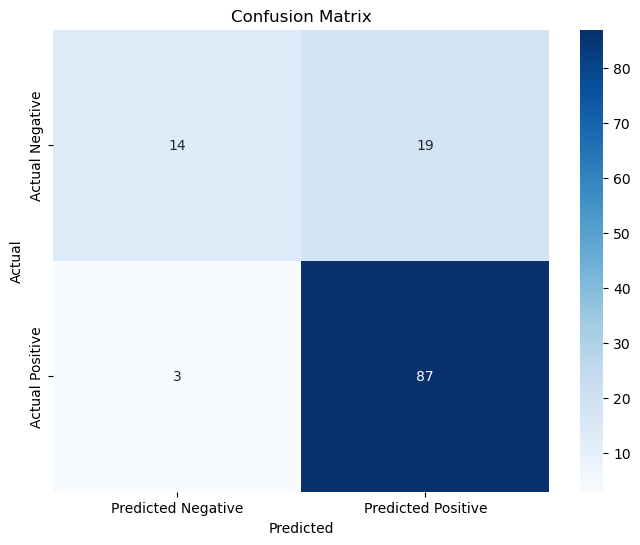

In [39]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Gaussian Naive Bayes**

In [40]:
# Create Gaussian Naive Bayes Object
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [41]:
# Predicting the Test set results
gnb_pred=gnb.predict(X_test)

In [42]:
#Print train and test accuracy score
print('train_accuracy :', gnb.score(X_train,y_train))
print('test_accuracy :' ,gnb.score(X_test, y_test))

train_accuracy : 0.7942973523421588
test_accuracy : 0.8292682926829268


In [43]:
# Classification_Report
gnb_report=classification_report(y_test,gnb_pred)
print(gnb_report)

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



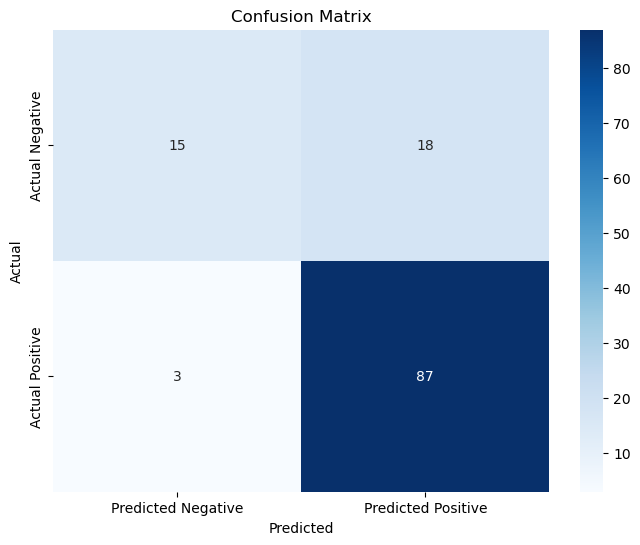

In [44]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, gnb_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Decision Tree**

In [45]:
# Create Decision Tree Object
dt=DecisionTreeClassifier(max_leaf_nodes=10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [46]:
# Predicting the Test set results
dt_pred=dt.predict(X_test)

In [47]:
#Print train and test accuracy score
print('train_accuracy :', dt.score(X_train,y_train))
print('test_accuracy :' ,dt.score(X_test, y_test))

train_accuracy : 0.8309572301425662
test_accuracy : 0.7723577235772358


In [48]:
# Classification_Report
dt_report=classification_report(y_test,dt_pred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.59      0.48      0.53        33
           1       0.82      0.88      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.68      0.69       123
weighted avg       0.76      0.77      0.76       123



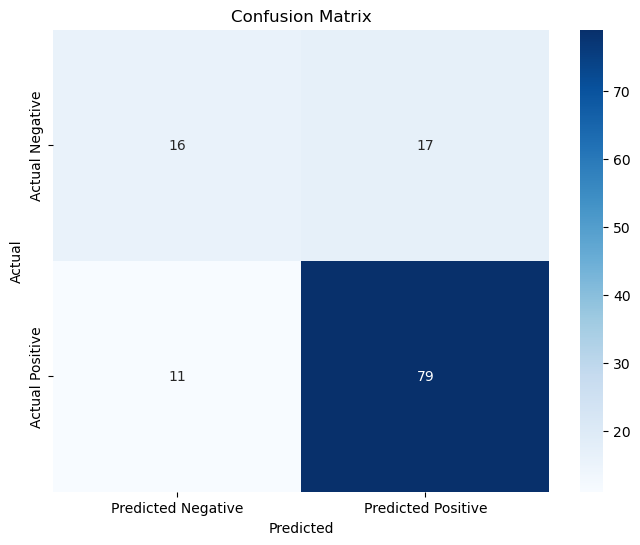

In [49]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest Classifier**

In [50]:
# Create Random Forest Classification Object
rfc=RandomForestClassifier(n_estimators=100, max_leaf_nodes=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=10)

In [51]:
# Predicting the Test set results
rfc_pred=rfc.predict(X_test)

In [52]:
#Print train and test accuracy score
print('train_accuracy :', rfc.score(X_train,y_train))
print('test_accuracy :' ,rfc.score(X_test, y_test))

train_accuracy : 0.8126272912423625
test_accuracy : 0.8292682926829268


In [53]:
# Classification_Report
rfc_report=classification_report(y_test,rfc_pred)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



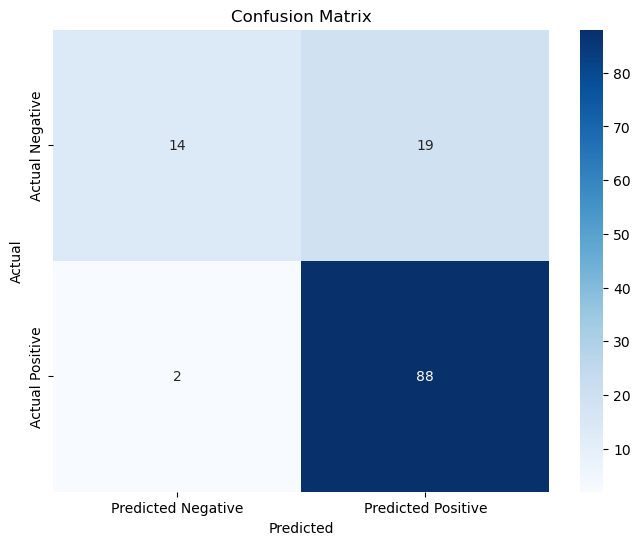

In [54]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, rfc_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Based on the provided metrics:

**Logistic Regression:**
- Test Accuracy: 0.8374
- F1-Score (Class 0): 0.60
- F1-Score (Class 1): 0.90
- Weighted Average F1-Score: 0.82

**SVM:**
- Test Accuracy: 0.8211
- F1-Score (Class 0): 0.56
- F1-Score (Class 1): 0.89
- Weighted Average F1-Score: 0.80

**Gaussian Naive Bayes:**
- Test Accuracy: 0.8293
- F1-Score (Class 0): 0.59
- F1-Score (Class 1): 0.89
- Weighted Average F1-Score: 0.81

**Decision Tree:**
- Test Accuracy: 0.7724
- F1-Score (Class 0): 0.53
- F1-Score (Class 1): 0.85
- Weighted Average F1-Score: 0.76

**Random Forest Classifier:**
- Test Accuracy: 0.8293
- F1-Score (Class 0): 0.57
- F1-Score (Class 1): 0.89
- Weighted Average F1-Score: 0.81

Considering the combined information of accuracy, precision, recall, and F1-score, the "Logistic Regression" model appears to have the best overall performance across different metrics. It achieves a good balance between precision and recall for both classes, resulting in a higher weighted average F1-score.


## Comparing Machine Learning Model Performance with Hyperparameter Tuning: Unveiling Optimal Configurations for Enhanced Accuracy

In [77]:
# Create Models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

In [78]:
# Hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    "Gaussian Naive Bayes": {},  # No hyperparameters to tune
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest Classifier": {
        'n_estimators': [100, 200, 300],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

In [79]:
# Perform hyperparameter tuning and cross-validation for each model
for model_name, model in models.items():
    print(f"Tuning {model_name}")
    param_grid = param_grids[model_name]
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    # Perform cross-validation on the best model
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Cross-Validated Accuracy:", grid_search.best_score_)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Score:", np.mean(cv_scores))
    print("-" * 40)

Tuning Logistic Regression
Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.8044320758606472
Cross-Validation Scores: [0.82828283 0.81632653 0.82653061 0.73469388 0.81632653]
Mean Cross-Validation Score: 0.8044320758606472
----------------------------------------
Tuning SVM
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Accuracy: 0.8044320758606472
Cross-Validation Scores: [0.82828283 0.81632653 0.82653061 0.73469388 0.81632653]
Mean Cross-Validation Score: 0.8044320758606472
----------------------------------------
Tuning Gaussian Naive Bayes
Best Hyperparameters: {}
Best Cross-Validated Accuracy: 0.7902288188002473
Cross-Validation Scores: [0.78787879 0.80612245 0.80612245 0.7244898  0.82653061]
Mean Cross-Validation Score: 0.7902288188002473
----------------------------------------
Tuning Decision Tree
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_lea

we explored the effects of hyperparameter tuning on the performance of various machine learning models. By highlighting the nuanced improvements achieved through tuning, our results emphasize the empirical significance of investing effort into optimizing models for real-world applications. Notably, the **Random Forest Classifier** emerged as a **slightly more accurate choice** in our investigation, further cementing the importance of hyperparameter tuning in achieving optimal results.

## Random Forest Classifier Model Building

In [105]:
# Create Random Forest Classification Object with the best hyperparameters
best_rf_classifier = RandomForestClassifier(criterion='gini', max_depth=5, max_features='sqrt',
                                             min_samples_leaf=1, min_samples_split=2, n_estimators=200,
                                             random_state=42)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=200,
                       random_state=42)

In [95]:
# Predicting the Test set results
y_best_rf = best_rf_classifier.predict(X_test)

In [99]:
#Print train and test accuracy score
print('train_accuracy of best rf :', best_rf_classifier.score(X_train,y_train))
print('test_accuracy of best rf :' ,best_rf_classifier.score(X_test, y_test))

train_accuracy of best rf : 0.8167006109979633
test_accuracy of best rf : 0.8292682926829268


In [104]:
# Claclassification_Report
best_rf_report=classification_report(y_test,y_best_rf)
print(best_rf_report)

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



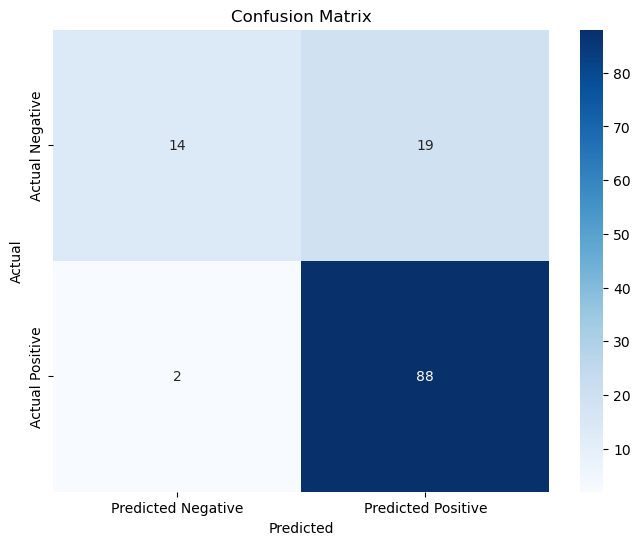

In [109]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_best_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [96]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_best_rf )
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7010101010101011


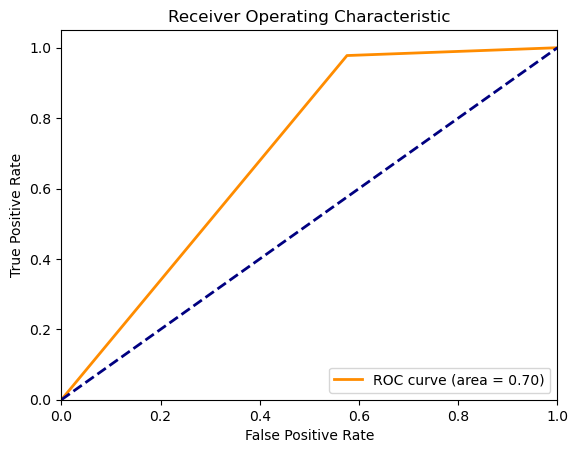

In [111]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_best_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

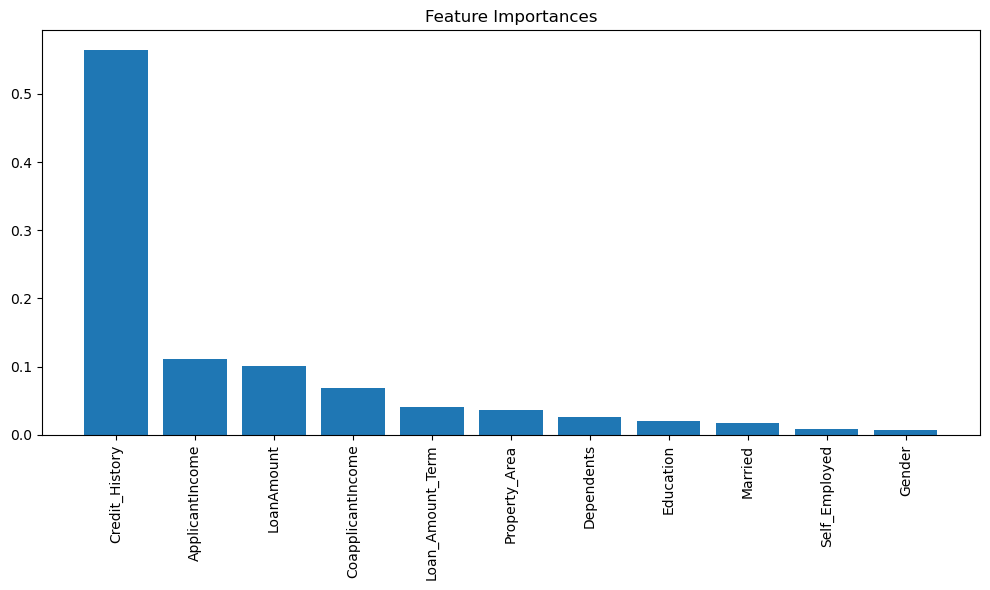

In [113]:
# Get feature importances
importances = best_rf_classifier.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')
plt.tight_layout()
plt.show()